# Shor Tutorial

### Install the qiskit library in the colab environment

Please run the below cell to ensure the notebook has qiskit installed.

In [1]:
# Install the qiskit library
%pip install 'qiskit[visualization]'
%pip install qiskit-ibm-runtime
%pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import the necessary modules from the Qiskit library


In [1]:
import numpy as np
from qiskit.visualization import *
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as real_sampler
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile

### Authenticate with IBM quantum

You will require the API token specified in the IBM quantum platform to ensure you can execute your code on a real quantum computer.

In [2]:
my_token = "<Paste your token here>"

service = QiskitRuntimeService(channel="ibm_quantum", token=my_token)

## Inspiration

A prime number is a natural number greater than 1 that is divisible by only 1 and itself. The first five prime numbers are $2, 3, 5, 7,$ and $11$. By multiplying two prime numbers, we can generate composite numbers with two prime factors. For example $15 = 3 \times 5$. 

An interesting question to ask is, given a composite number, can one devise an algorithm to find its prime factors? We can write a classical algorithm to solve this problem.

In [3]:
import time

def prime_factors(n):
    """Returns the prime factors of a number
    Args:
        n (int): The integer to factor
    Returns:
        list: The list of prime factors
    """
    start = time.time()
    print("n={}".format(n))
    factors = []
    divisor = 2
    while n > 2:
        if n % divisor == 0:
            factors.append(divisor)
            n = n / divisor
        else:
            divisor += 1
    end = time.time()
    time_taken = end - start
    print("Time taken to factorize: {} seconds".format(time_taken))
    return factors

You can use this function to find prime factors of 15,

In [4]:
n = 15 # change to XX

print("The prime factors of {} are: {}".format(n,prime_factors(n)))

n=15
Time taken to factorize: 0.00010991096496582031 seconds
The prime factors of 15 are: [3, 5]


15 is a small number which can be easily factorised. Let's try to factorise a large integer.

In [5]:
n = 1000001789999791

print("The prime factors of {} are: {}".format(n, prime_factors(n)))


n=1000001789999791
Time taken to factorize: 5.716923952102661 seconds
The prime factors of 1000001789999791 are: [10000019, 99999989]


Did you notice a difference between the two function calls? Factoring of the larger number takes significantly more time.

We can confirm that the resultant factors of 1000001789999791 are indeed prime numbers using the following function.

In [6]:
import numpy as np

def is_prime(n):
    """Returns True if n is prime, False otherwise
    Args:
        n (int): The integer to test
    Returns:
        bool: True if n is prime, False otherwise
    """
    if n < 2:
        return False
    elif n == 2:
        return True
    else:
        for i in range(2, int(np.sqrt(n))):
            if n % i == 0:
                return False
        return True

In [7]:
a = 10000019 # change to XX
b = 99999989 # change to XX

# test whether a and b are prime

print("Is a prime? ", is_prime(a))
print("Is b prime? ", is_prime(b))
print("Is 15 a prime? ", is_prime(15))

Is a prime?  True
Is b prime?  True
Is 15 a prime?  True


Finding prime factors of large composite numbers is important in fields like cryptography. In this tutorial, we look at the Shor's algorithm. Shor's algorithm is a quantum algorithm for finding prime factors of an integer.

## Period Finding

The quantum part of the Shor's algorithm is concerned with the problem of period finding. Let's define the periodic function $f(x)$ by

$$
    f(x) = a^x\mod N
    $$

$\mod N$ stands for [division modulo $N$](https://www.khanacademy.org/computing/computer-science/cryptography/modarithmetic/a/what-is-modular-arithmetic). Modular division returns the remainder when dividing one number by another. For example

$$
    11 = 3 \mod 4
    $$
since $11 \div 4$ returns $3$ as the remainder, i.e., $11 = 2 \times 4 + 3$.

The period of function $f(x)$ is defined as the smallest non-zero integer $r$ such that $f(r) = a^r \mod N = 1$. A unique $r>0$ exists as long as $a<N$, and $a$ and $N$ do not have common factors, i.e., $\gcd(a,N)=1$ (gcd stands for greatest common denominator).

In [8]:
# f(x) = a^x mod N

def f(x, a, N):
    """f(x) = a^x mod N
    Args:
        x (int): The exponent
        a (int): The base
        N (int): The modulus
    Returns:
        int: The result of a^x mod N
    """
    return a**x % N

In [9]:
def period(f, a, N, max_period=100):
    """Returns the period of f(x=r) = a^r mod N = 1
    Args:
        f (function): The function to test
        a (int): The base
        N (int): The modulus
        max_period (int): The maximum period to test
    Returns:
        int: The period of f(x) = a^x mod N, 0 if no period found
        basis (list): The list of intermediate function values [f(x)]
    """
    basis = []
    for i in range(1,max_period+1):
        y = f(i, a, N)
        # print("i={}, y={}".format(i, y))
        basis.append(y)
        if y == 1:
            return i , basis
    return 0, basis

Let's try finding the period of $f(x) = a^x \mod N$ for $a=3, N=15$, and $a=7, N=15$.

In [10]:
a = 3
N = 15

p, basis = period(f, a, N)

if p > 0:
    print("The period of f(x) = " + str(a)+"^x mod + " + str(N)+" is: ", p)
else:
    print("No period found. Consider increasing max_period, or check that a and N are coprime.")


a = 7
N = 15

p, basis = period(f, a, N)

if p > 0:
    print("The period of f(x) = " + str(a)+"^x mod + " + str(N)+" is: ", p)
else:
    print("No period found for f(x) = " + str(a)+"^x mod + " + str(N)+" . Consider increasing max_period, or check that a and N are coprime.")

No period found. Consider increasing max_period, or check that a and N are coprime.
The period of f(x) = 7^x mod + 15 is:  4


## Shor's unitary operator

Let's go back to the periodic function $f(x) = 7^x \mod 15$.

In [11]:
a = 7
N = 15

r, basis = period(f, a, N)

We will call the set of values of $f(x)$ evaluated at the intermediate steps of period finding as the basis.

In [12]:
print("The basis of f(x) = " + str(a)+"^x mod + " + str(N)+" is: ", basis)

The basis of f(x) = 7^x mod + 15 is:  [7, 4, 13, 1]


Let's define the operator $U$ by

$$
U \ket{y} = \ket{ay\mod N}.
$$
For $a=7$ and $N=15$, we can easily verify
$$
\begin{aligned}
U \ket{1} &= \ket {7 \mod 15} = \ket{7} \\
U^2 \ket{1} &= U \ket{7}= \ket {49 \mod 15} = \ket{4} \\
U^3 \ket{1} &= U \ket{4}= \ket {28 \mod 15} = \ket{13} \\
U^4 \ket{1} &= U \ket{13}= \ket {91 \mod 7} = \ket{1}
\end{aligned}
$$

Since $U^4\ket{1}=\ket{1}$, $U$ is a unitary operator. Let's implement the operator $U^k$ using Qiskit. First we need to import some dependencies.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# from qiskit import QuantumCircuit, Aer, transpile
# from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

Let's define a quantum circuit implementing controlled-$U^k\ket{y}$ where $U^k \ket{y} = \ket{a^k y \mod 15}$. For $a=7$, this implements the transformations described above.

In [14]:
def c_amod15(a, k):
    """Controlled multiplication by a mod 15
    Args:
        a (int): the integer a that defines the multiplication fuction
        power (int): the power of a
    Returns:
        Gate: the controlled unitary gate implementing a^k mod 15
    """
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(k):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{k} mod 15"
    c_U = U.control()
    return c_U

## Eigenstates of $U$

Let's define as $\ket{u_0}$ the state created by symmetric superposition of these basis states.

$$\begin{aligned}
\ket{u_0}
    &=
        \frac{1}{2} \left (
                \ket{1} + \ket{7} + \ket{4} + \ket{13}
        \right )  \\
U\ket{u_0}
    &=
        \frac{1}{2} \left (
                U\ket{1} + U\ket{7} + U\ket{4} + U\ket{13}
        \right )  \\
U\ket{u_0}
    &=
        \frac{1}{2} \left (
                \ket{7} + \ket{4} + \ket{13} + \ket{1}
        \right )  \\
U\ket{u_0}
        &=
                \ket{u_0}
\end{aligned}
$$
$\ket{u_0}$ is an eigenstate of operator $U$. In fact, any state $\ket{u_s}$ defined for $s<r (=4)$ by

$$
\ket{u_s}
        =
                \frac{1}{\sqrt{r}} \sum_{k=0}^{r-1} \exp{\left (-\frac{2 \pi i s k}{r} \right )} U^k\ket{1}
$$
is an eigenstate of the operator $U$, i.e.,
$$
        U \ket{u_s}
                =
                        \exp{\left(\frac{2 \pi i s}{r}\right)} \ket{u_s}
$$

Now we face two problems. First, we need to prepare the state $\ket{u_s}$, which requires information about $r$, the value we seek to find in the first place! However, noting that summing all $\ket{u_s}$ states cancels out the phases to give

$$
\ket{1}
    =
        \frac{1}{\sqrt{r}} \sum_{k=0}^{r-1} \ket{u_s}
$$
we can use the easy-to-prepare state $\ket{1}$ as the initial target state for the algorithm. Since 
$$U \ket{u_s}=
                        \exp{\left(\frac{2 \pi i s}{r}\right)} \ket{u_s}
$$, 
once we have an algorithm to measure the phase of $U$, we will measure a phase $\phi = \frac{s}{r}$ where $s$ will be a random integer between 0 and $r-1$ drawn from a uniform distribution. 
                

Now we introduce the quantum phase estimation algorithm to solve this problem.

## Quantum Phase Estimation

[Quantum phase estimation](https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation) (QPE) is an algorithm to estimate the phase $\theta$ in $U\ket{\psi} = \exp{(2 \pi i \theta)} \ket{\psi}$. The phase of the state $\ket{\psi}$ is recorded in a qubit register of $N\_COUNT$ qubits, and the accuracy of the approximation increases with the size of the counting qubit registry. Here we outline the steps of QPE.

Step 1 : Apply Hadamard gates to each individual qubit in the counting register to prepare a maximally entangled counting registry.

In [15]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)     # change to qc.XX(q)

As explained above, we prepare the target register containing $\ket{\psi}$ in state $\ket{1}$. Keeping in mind qiskit's least significant bit has the lowest index, this is achieved by

In [16]:
qc.x(N_COUNT)

Step 2 : Perform a series of controlled-U operations on the target registry using the counting registry as the control. Due to a phenomena called [phase kickback](https://learn.qiskit.org/course/ch-gates/phase-kickback), the application of unitaries result in the phase $\theta$ of $U$ being recorded in the counting registry in the Fourier basis.

In [17]:
# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

Step 3 : Perform an [inverse quantum Fourier transform](https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform) to recover $\theta$.

In [18]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ
    Args:
        n (int): number of qubits to be transformed
    Returns:
        Gate: A quantum circuit implementing the inverse QFT
    """
    qc = QuantumCircuit(n)
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

In [19]:
# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))

# draw the circuit
qc.draw(fold=-1)

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

We can run this circuit on a simulator...

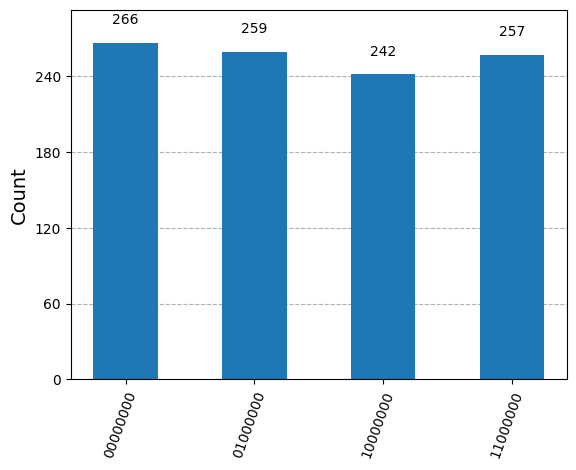

In [24]:
sim = AerSimulator()
sampler = SamplerV2()
t_circ = transpile(qc, sim)
results = sampler.run([t_circ]).result()
answer = results[0].data.c.get_counts()
plot_histogram(answer)

...and convert the results to decimal.

In [27]:
rows, measured_phases = [], []

for output in answer:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  01000000(bin) =  64(dec)   64/256 = 0.25
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  11000000(bin) = 192(dec)  192/256 = 0.75
3  00000000(bin) =   0(dec)    0/256 = 0.00


To find $r$, we need to express phase $\phi$ as a rational number. 

In [28]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.50      1/2            2
2   0.75      3/4            4
3   0.00      0/1            1


Shor's algorithm finds $r=4$, the correct period around $50\%$ of the time. This is a consequence of using $\ket{1}$ instead of $\ket{u_s}$ to initialise the target registry, and as a consequence measuring $s=0$ or $s$ with $\gcd(s,r) \ne 1$. In the instances where the algorithm fails, a factor of the true period is found.

## Factoring

From the solution to the period finding problem, we found $r=4$ such that $7^4 \mod 15 = 1$. We now aim to use this information to find the factors of $N=15$.

We begin by noting that $r=4$ is even. Since $r$ depends on the choice of $a$, $a$ is picked randomly until an even $r$ is found. Since $r$ is even, we can write, for some integer $x$,

$$
\begin{aligned}
    a^r \mod N &=1 \\
    a^r - 1 &= xN \\
    (a^{r/2}-1)(a^{r/2}+1) &= xN
\end{aligned}
$$
From this factorisation, we can see that $a^{r/2} \pm 1$ is highly likely to share a factor with $N$. Therefore, we can guess the greatest common dividers of these two integers with N to be a factor of N.


In [29]:
# Guesses for factors are gcd(x^{r/2} ±1 , 15)
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")

Guessed Factors: 3 and 5


Congratulations! You have used quantum algorithms to correctly find the prime factors of 15.

In [ ]:
# def qpe_amod15(a):
#     """Performs quantum phase estimation on the operation a*r mod 15.
#     Args:
#         a (int): This is 'a' in a*r mod 15
#     Returns:
#         float: Estimate of the phase
#     """
#     N_COUNT = 8
#     qc = QuantumCircuit(4+N_COUNT, N_COUNT)
#     for q in range(N_COUNT):
#         qc.h(q)     # Initialize counting qubits in state |+>
#     qc.x(3+N_COUNT) # And auxiliary register in state |1>
#     for q in range(N_COUNT): # Do controlled-U operations
#         qc.append(c_amod15(a, 2**q),
#                  [q] + [i+N_COUNT for i in range(4)])
#     qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
#     qc.measure(range(N_COUNT), range(N_COUNT))
#     # Simulate Results
#     aer_sim = Aer.get_backend('aer_simulator')
#     # `memory=True` tells the backend to save each measurement in a list
#     job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
#     readings = job.result().get_memory()
#     print("Register Reading: " + readings[0])
#     phase = int(readings[0],2)/(2**N_COUNT)
#     print(f"Corresponding Phase: {phase}")
#     return phase

In [ ]:
# a = 7
# FACTOR_FOUND = False
# ATTEMPT = 0
# while not FACTOR_FOUND:
#     ATTEMPT += 1
#     print(f"\nATTEMPT {ATTEMPT}:")
#     phase = qpe_amod15(a) # Phase = s/r
#     frac = Fraction(phase).limit_denominator(N)
#     r = frac.denominator
#     print(f"Result: r = {r}")
#     if phase != 0:
#         # Guesses for factors are gcd(x^{r/2} ±1 , 15)
#         guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
#         print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
#         for guess in guesses:
#             if guess not in [1,N] and (N % guess) == 0:
#                 # Guess is a factor!
#                 print("*** Non-trivial factor found: " + str(guess)+ " ***")
#                 FACTOR_FOUND = True

## Further reading

1. [Story of Shor's algorithm](https://www.youtube.com/watch?v=6qD9XElTpCE&t=130s)
2. [Qiskit tutorial on QPE](https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation)
3. [Qiskit tutorial on Shor's algorithm](https://learn.qiskit.org/course/ch-algorithms/shors-algorithm)